In [1]:
from data_split import view_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import os
# n_clients=5
# for split_id in range(3):
#     dist={}
#     for k in range(n_clients):
#         cur_clint_path = os.path.join(data_path, f'{n_clients}_clients', f'split_{split_id+1}', f'client_{k+1}.csv')
#         img_paths = list({line.strip().split(',')[0] for line in open(cur_clint_path)})
#         img_paths_with_extension = [f'{path}.jpg' for path in img_paths]
        
#         with open(f'/data/yan/SSL-FL/ISIC/fix/split_{split_id+1}/client_{k+1}.csv', 'w') as f:
#             for item in img_paths_with_extension:
#                 f.write("%s\n" % item)
        

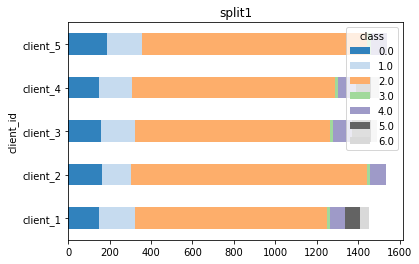

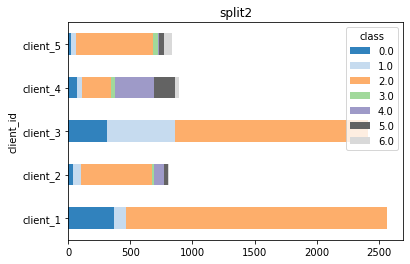

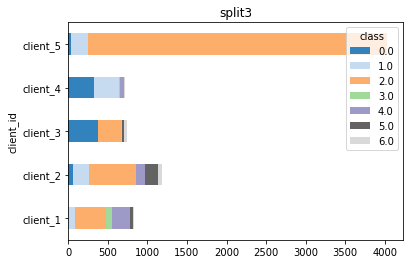

In [4]:
# data_path='/data/yan/SSL-FL/COVIDx'
# data_path='/data/yan/SSL-FL/Retina'
# data_split(data_path, 5, 2)
out = view_split(data_path, 7, save_plot='True')

In [ ]:
df = pd.DataFrame(out)
for split_id in range(3):
    df_split = df.iloc[:,split_id].apply(pd.Series)
    df_split = df_split.reindex(sorted(df_split.columns), axis=1)
    df_split['client_id'] = sorted(df_split.index)
    df_split.plot(x='client_id', kind='barh', rot=0, stacked=True, colormap='tab20c', title=f'split{split_id+1}')
    plt.legend(title='class', loc='upper right')
    plt.show()

In [19]:
import os
from collections import Counter

data_path='/data/yan/SSL-FL/COVIDfl'

n_clients=7

labels = {line.strip().split(',')[0]: float(line.strip().split(',')[1]) for line in
          open(os.path.join(data_path, 'labels.csv'))}

clients = ['sirm', 'bimcv', 'cohen', 'eurorad', 'ml-workgroup', 'ricord_c', 'gz']

out={}
dist={}
for k in range(n_clients):
    cur_clint_path = os.path.join(data_path, f'{n_clients}_clients', f'split_real', f'{clients[k]}.csv')
    img_paths = list({line.strip().split(',')[0] for line in open(cur_clint_path)})
    # print(img_paths[:5])
    dist[f'{clients[k]}'] = Counter([label for fname, label in labels.items() if fname in img_paths])
out['split_real'] = dist
# print(f'split_{split_id+1}: ', dist)

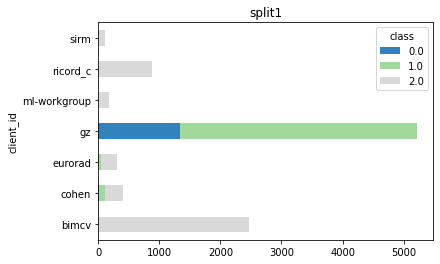

In [20]:
df = pd.DataFrame(out)
split_id=0
df_split = df.iloc[:,split_id].apply(pd.Series)
df_split = df_split.reindex(sorted(df_split.columns), axis=1)
df_split['client_id'] = sorted(df_split.index)
df_split.plot(x='client_id', kind='barh', rot=0, stacked=True, colormap='tab20c', title=f'split{split_id+1}')
plt.legend(title='class')

data_set = os.path.split(data_path)[1]
plt.savefig(f"/home/yan/SSL-FL/plots/split/{data_set}_split_real.png")
plt.show()